## The request input part
First experiment with 50 requests in total, 4 requests were rejected (not enqueued) 
With a probability of appr. 70% + 10%, user 2 requests arrived. The rest was left to users 0 and 1.
```
double rNum = random.nextDouble();
if (rNum > 0.3) {                               # 70% user 2
    user = new User(2, ++cnt);
else
    user = new User(random.nextInt(3), ++cnt);  # 10% user 2
```

# TODO:
## 1. Try without cutting off with rejected policy
## 2. increase q_swap factor, so to favor fast q

In [6]:
import numpy as np
import matplotlib.pyplot as plt

### This is a legend to the data in the csv files:

In [7]:
# IN,  1,     2,1852440846143583, 0,    1,         1
#
#  0,  1  ,   2  ,   3    ,   4   ,     5    ,     6
#
# IN, round, UID, arriTime, deqTime, prioQed,  requestID

#
#prioQed legend:
# F ---> 0    #Fast Queue
# S ---> 1    #Slow Queue
# R ---> 2    #Rejected (not enqueued)

In [9]:
# import csv data TODO

#exp_no = 1
#Exp1: 50 req
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
#data_all = np.genfromtxt("sorted_log.2024-08-22T23:20:00.212427.csv", delimiter=',')

#exp_no = 2
#Exp2: 50 req
#rNum > 0.5 for user 2 and user = new User(random.nextInt(2!!!not 3), ++cnt); for the user 0 and 1
#data_all = np.genfromtxt("sorted_exp2_log.2024-08-29T17:07:01.272412.csv", delimiter=',')

#exp_no = 3
#Exp3: 500 req
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
#PENALTY_LIMIT = REQUEST_COUNT_LIMIT + 50; //was @ 10
#REQUEST_COUNT_LIMIT = 30 //was 5
#data_all = np.genfromtxt("sorted_exp3_log.2024-08-29T18:56:19.FS_no_R.csv", delimiter=',')

#exp_no = 4
#Exp4: 500 req no rejected policy
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
#PENALTY_LIMIT = REQUEST_COUNT_LIMIT + infinity; //was @ 10
#REQUEST_COUNT_LIMIT = 30 //was 5
#data_all = np.genfromtxt("sorted_exp4_log.2024-09-04T12:49:21.csv", delimiter=',')

exp_no = 5
# 500 req no rejected policy
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
#PENALTY_LIMIT = REQUEST_COUNT_LIMIT + infinity; //means no request will be rejected
#REQUEST_COUNT_LIMIT = 30 //was 5
#swapQ = 10 // was 5
#data_all = np.genfromtxt("sorted_exp5_log.2024-09-04T18:51:19.csv", delimiter=',')

exp_no = 6
# 500 req no rejected policy
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
#PENALTY_LIMIT = REQUEST_COUNT_LIMIT + infinity; //means no request will be rejected
#REQUEST_COUNT_LIMIT = 30 //was 5
#swapQ = 10 // was 5
#data_all = np.genfromtxt("sorted_exp6_log.2024-09-04T19:17:07.csv", delimiter=',')

exp_no = 7
# 500 req no rejected policy
#rNum > 0.6 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
#PENALTY_LIMIT = REQUEST_COUNT_LIMIT + infinity; //means no request will be rejected
#REQUEST_COUNT_LIMIT = 30 //was 5
#swapQ = 30 // was 10
#data_all = np.genfromtxt("sorted_exp7_log.2024-09-04T19:25:26.csv", delimiter=',')

exp_no = 8
# 1000 req no rejected policy
#rNum > 0.6 for user 2 and user = new User(random.nextInt(2), ++cnt); for the user 0 and 1 
#PENALTY_LIMIT = REQUEST_COUNT_LIMIT + infinity; //means no request will be rejected
#REQUEST_COUNT_LIMIT = 30 //was 5
#swapQ = 50 // was 30
#data_all = np.genfromtxt("../Exp8/sorted_exp8_log.2024-09-04T19:35:15.csv", delimiter=',')

exp_no = 9
#Exp9: 500 req
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
#data_all = np.genfromtxt("../Exp9_one_Q/sorted_exp9_one_Q_log.2024-09-05T18:21:39.csv", delimiter=',')


exp_no = 10
#Exp10: 1000 req
#swapQ = 50 // was 30
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
data_all = np.genfromtxt("../Exp10/sorted_exp10_log.2024-09-05T18:48:59.csv", delimiter=',')

exp_no = 11
#Exp11: 1000 req
#swapQ = 30 // was 30
#rNum > 0.3 for user 2 and user = new User(random.nextInt(3), ++cnt); for the user 0 and 1 AND 2 also!!
data_all = np.genfromtxt("../Exp11/sorted_exp10_log.2024-09-05T19:22:07.csv", delimiter=',')

exp_no = 12
data_all = np.genfromtxt("../Exp12/sorted_exp12_log.2024-09-05T22:35:23.csv", delimiter=',')

exp_no = 13
data_all = np.genfromtxt("../Exp13/sorted_exp13_log.2024-09-05T22:46:51.csv", delimiter=',')

exp_no = 14
data_all = np.genfromtxt("../Exp14/sorted_exp14_log.2024-09-05T23:00:05.csv", delimiter=',')

exp_no = 15
data_all = np.genfromtxt("../sorted_exp15_log.2024-09-11T15:04:37.csv", delimiter=',')



In [10]:
#num_rejected = [ i for i in range(len(data_all)) if data_all[i, 5] == "F"]
num_rejected = 0
for i in range(len(data_all)):
    if data_all[i, 5] == 2:
        num_rejected += 1
num_rejected

0

In [11]:
with_rejected = False
arri_dq_t = 3   # 3 is cv index for arriTime and 4 is deqTime
UID = 2         #2 is csv index for user id
q_type = 5     # 5 is csv index for the q type (fast, slow, 'rejected')

total_requests = 500

csv_row_upper = 0
if with_rejected:
    csv_row_lower = total_requests - 1
else:
    csv_row_lower = (len(data_all) // 2) -1
total_time_IN =  data_all[csv_row_lower, arri_dq_t] - data_all[csv_row_upper, arri_dq_t]

total_time_IN, csv_row_lower, data_all[csv_row_lower,arri_dq_t], data_all[csv_row_upper, arri_dq_t]

(1377849422.0, 9999, 3626294563803.0, 3624916714381.0)

In [24]:
amount_intervals = 100
time_interval = total_time_IN / amount_intervals
time_interval

13778494.22

In [25]:
in_secs = time_interval / 1E9
in_ms = time_interval / 1E6
print("time_interval: \n{} s\n{} ms".format(in_secs.round(3), in_ms.round(3)))
print
print("Total time for enqueueing: \n{} s\n{} ms".format(round((total_time_IN / 1E9),3), round((total_time_IN / 1E6),3)))

time_interval: 
0.014 s
13.778 ms
Total time for enqueueing: 
1.378 s
1377.849 ms


In [26]:
len_all = len(data_all)
len_clean = len_all - num_rejected
len_OUT_part = (len_clean // 2)
len_IN_part = csv_row_lower + 1 
len_all, len_clean, len_IN_part, len_OUT_part

(20000, 20000, 10000, 10000)

In [27]:
arr0 = np.zeros([amount_intervals + 1])
arr1 = np.zeros([amount_intervals + 1])
arr2 = np.zeros([amount_intervals + 1])

arr3 = np.zeros([amount_intervals + 1])
arr4 = np.zeros([amount_intervals + 1])
arr5 = np.zeros([amount_intervals + 1])

arr6 = np.zeros([amount_intervals + 1])
arr7 = np.zeros([amount_intervals + 1])
arr8 = np.zeros([amount_intervals + 1])

arr9 = np.zeros([amount_intervals + 1])


arrq0 = np.zeros([amount_intervals + 1]) # number of fast Queue array
arrq1 = np.zeros([amount_intervals + 1]) # number of slow Queue array
arrq2 = np.zeros([amount_intervals + 1]) # number of rejected array

upper_idx = len_IN_part // amount_intervals
lower_bound = data_all[csv_row_upper, arri_dq_t]

for k in range(1, amount_intervals + 2): # exceed num of intervals to obtain the latest dequeue time
    arr_idx = k
    if ((k * upper_idx)) > (len_IN_part - 1): # set upper_bound to latest dequeue time
        upper_bound = data_all[(len_IN_part -1), arri_dq_t]
        arr_idx = amount_intervals
    else:
        upper_bound = data_all[((k * upper_idx)), arri_dq_t] # everything below the latest deQ time
    #print(k)   
    #print(((k * upper_idx)))
    #print(upper_bound)
    for i in range(len_IN_part):
        time = data_all[i, arri_dq_t]
        #print(i, lower_bound, time, upper_bound)
        if k < amount_intervals:
            cond1 = (lower_bound <= time < upper_bound)
        else:
            cond1 = (lower_bound <= time <= upper_bound) #include requests that came latest, too.
        if cond1:  
            match data_all[i,UID]:
                case 0:
                    if data_all[i,q_type] == 0: # q_type 0 == fast Queued
                        arrq0[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 1: # q_type 1 == slow Queued
                        arrq1[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 2: # q_type 2 == rejected
                        arrq2[arr_idx - 1] += 1
                        continue
                    arr0[arr_idx - 1] += 1
                case 1:
                    if data_all[i,q_type] == 0: # q_type 0 == fast Queued
                        arrq0[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 1: # q_type 1 == slow Queued
                        arrq1[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 2: # q_type 2 == rejected
                        arrq2[arr_idx - 1] += 1
                        continue
                    arr1[arr_idx - 1] += 1
                case 2:
                    if data_all[i,q_type] == 0: # q_type 0 == fast Queued
                        arrq0[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 1: # q_type 1 == slow Queued
                        arrq1[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 2: # q_type 2 == rejected
                        arrq2[arr_idx - 1] += 1
                        continue
                    arr2[arr_idx - 1] += 1
                case 3:
                    if data_all[i,q_type] == 0: # q_type 0 == fast Queued
                        arrq0[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 1: # q_type 1 == slow Queued
                        arrq1[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 2: # q_type 2 == rejected
                        arrq2[arr_idx - 1] += 1
                        continue
                    arr3[arr_idx - 1] += 1
                case 4:
                    if data_all[i,q_type] == 0: # q_type 0 == fast Queued
                        arrq0[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 1: # q_type 1 == slow Queued
                        arrq1[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 2: # q_type 2 == rejected
                        arrq2[arr_idx - 1] += 1
                        continue
                    arr4[arr_idx - 1] += 1
                case 5:
                    if data_all[i,q_type] == 0: # q_type 0 == fast Queued
                        arrq0[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 1: # q_type 1 == slow Queued
                        arrq1[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 2: # q_type 2 == rejected
                        arrq2[arr_idx - 1] += 1
                        continue
                    arr5[arr_idx - 1] += 1
                case 6:
                    if data_all[i,q_type] == 0: # q_type 0 == fast Queued
                        arrq0[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 1: # q_type 1 == slow Queued
                        arrq1[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 2: # q_type 2 == rejected
                        arrq2[arr_idx - 1] += 1
                        continue
                    arr6[arr_idx - 1] += 1
                case 7:
                    if data_all[i,q_type] == 0: # q_type 0 == fast Queued
                        arrq0[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 1: # q_type 1 == slow Queued
                        arrq1[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 2: # q_type 2 == rejected
                        arrq2[arr_idx - 1] += 1
                        continue
                    arr7[arr_idx - 1] += 1
                case 8:
                    if data_all[i,q_type] == 0: # q_type 0 == fast Queued
                        arrq0[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 1: # q_type 1 == slow Queued
                        arrq1[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 2: # q_type 2 == rejected
                        arrq2[arr_idx - 1] += 1
                        continue
                    arr8[arr_idx - 1] += 1
                case 9:
                    if data_all[i,q_type] == 0: # q_type 0 == fast Queued
                        arrq0[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 1: # q_type 1 == slow Queued
                        arrq1[arr_idx - 1] += 1
                    elif data_all[i,q_type] == 2: # q_type 2 == rejected
                        arrq2[arr_idx - 1] += 1
                        continue
                    arr9[arr_idx - 1] += 1
    lower_bound = upper_bound
    #print("--------")
    
arr0.sum(), arr1.sum(), arr2.sum(),arr3.sum(),arr0, arr1, arr2,  (arr0.sum()+ arr1.sum()+ arr2.sum()), arrq0, arrq1, arrq2, arrq0.sum(), arrq1.sum(), arrq2.sum()
        

(732.0,
 729.0,
 3626.0,
 699.0,
 array([ 8.,  6.,  9., 10.,  7.,  8.,  7.,  9.,  8.,  9., 13.,  6.,  5.,
         8.,  6.,  9.,  9.,  7.,  5., 10.,  3.,  7.,  4.,  7.,  5.,  3.,
         2.,  9.,  3.,  4.,  5.,  6.,  7.,  5.,  4., 10., 13., 12.,  9.,
         5.,  7.,  6.,  7.,  8.,  6., 15.,  2.,  9., 10.,  6.,  5.,  7.,
         8.,  8.,  8.,  3., 11.,  8.,  8.,  8.,  5.,  9., 11.,  6.,  6.,
         6.,  7.,  4.,  7.,  6., 11.,  7., 12.,  7.,  7.,  8.,  8.,  6.,
         7.,  2.,  9.,  9.,  4., 11., 10.,  7.,  9.,  8.,  8.,  5.,  9.,
         9.,  5.,  4., 13.,  9., 10.,  5., 10.,  4.,  0.]),
 array([ 3.,  9.,  5.,  7.,  3.,  6.,  6.,  7.,  7.,  6.,  5.,  9.,  8.,
         7.,  6., 10.,  5.,  6.,  9.,  9.,  3.,  6.,  9.,  7.,  5.,  9.,
        10.,  5., 14., 10.,  7.,  9.,  4.,  8.,  9.,  9.,  6.,  6.,  6.,
        12.,  8.,  9.,  8.,  9.,  9.,  5., 10., 13., 10., 12., 10.,  8.,
         9.,  4.,  6.,  8.,  6.,  3.,  3., 11., 12.,  4.,  7., 10.,  7.,
         6.,  4.,  5.,  9.,  7.

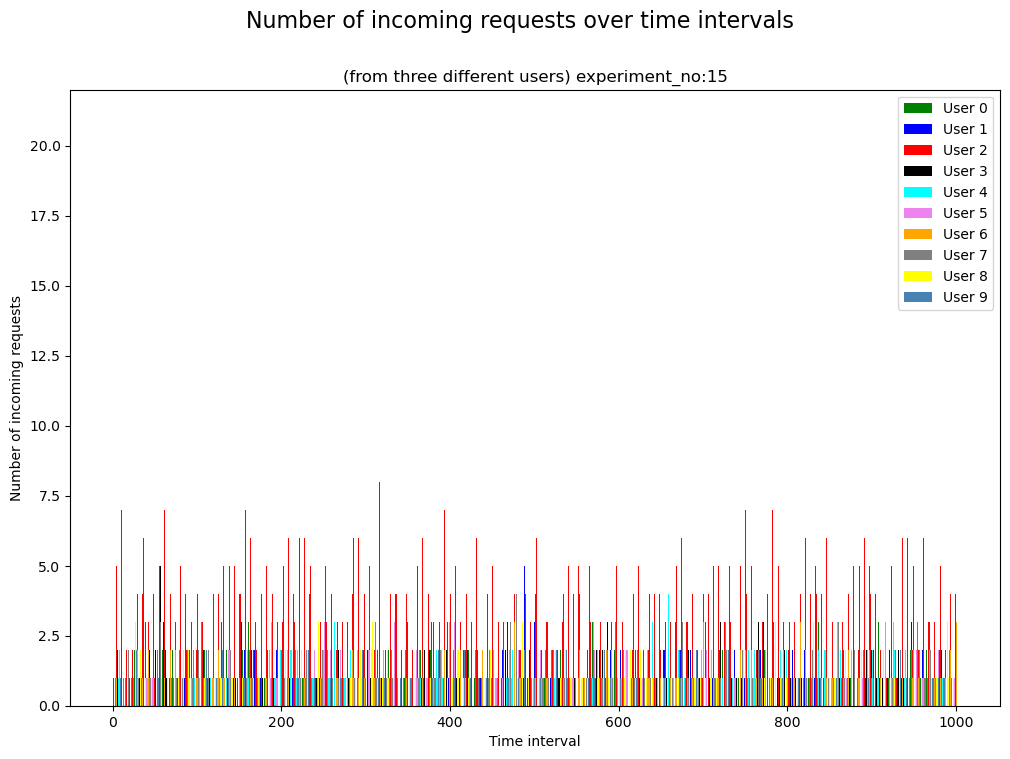

(732.0, 729.0, 3626.0, 699.0)

In [23]:
y_lim = 22
x = [i for i in range(amount_intervals)]
width=0.25
#alpha=0.5
ax = plt.figure(figsize=[12, 8])
plt.bar(np.arange(len(arr0)) ,arr0, width,align='center', label='User 0' , color='g')
plt.bar(np.arange(len(arr1)) + width ,arr1, width, align='center',  label='User 1', color='b')
plt.bar(np.arange(len(arr2)) + width*2,arr2, width,align='center',label='User 2' , color='r')
plt.bar(np.arange(len(arr3)) + width*3,arr3, width,align='center',label='User 3' , color='black')
plt.bar(np.arange(len(arr4)) + width*4,arr4, width,align='center',label='User 4' , color='cyan')
plt.bar(np.arange(len(arr5)) + width*5,arr5, width,align='center',label='User 5' , color='violet')
plt.bar(np.arange(len(arr6)) + width*6,arr6, width,align='center',label='User 6' , color='orange')
plt.bar(np.arange(len(arr7)) + width*7,arr7, width,align='center',label='User 7' , color='grey')
plt.bar(np.arange(len(arr8)) + width*8,arr8, width,align='center',label='User 8' , color='yellow')
plt.bar(np.arange(len(arr9)) + width*9,arr9, width,align='center',label='User 9' , color='steelblue')
#plt.bar(np.arange(len(arr3)) + width*3,arr3, width,align='center',label='Rejected' , color='black')
plt.xlabel('Time interval')
plt.ylabel('Number of incoming requests')
plt.suptitle('Number of incoming requests over time intervals', fontsize=16)#, y=1.00)
plt.title('(from three different users) experiment_no:{}'.format(exp_no))
plt.ylim(0,y_lim)
#plt.xticks(np.arange(len(x)+ width))
plt.legend()

plt.show()

arr0.sum(),arr1.sum(),arr2.sum(),arr3.sum()#,arr0, arr1, arr2, arr3

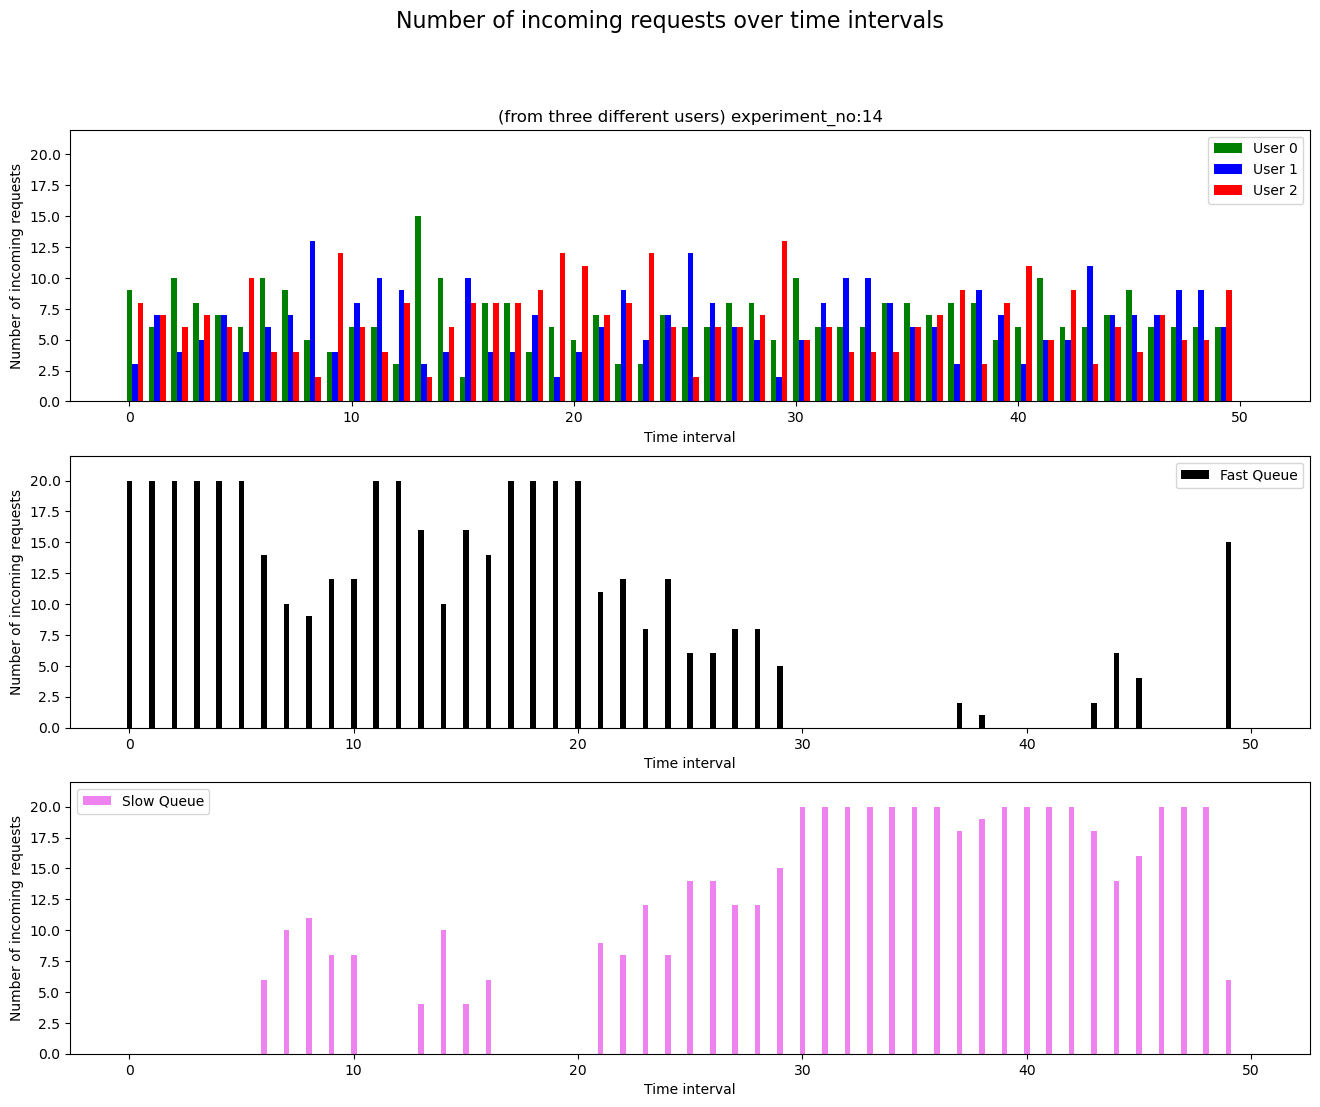

(340.0,
 326.0,
 335.0,
 0.0,
 array([ 9.,  6., 10.,  8.,  7.,  6., 10.,  9.,  5.,  4.,  6.,  6.,  3.,
        15., 10.,  2.,  8.,  8.,  4.,  6.,  5.,  7.,  3.,  3.,  7.,  6.,
         6.,  8.,  8.,  5., 10.,  6.,  6.,  6.,  8.,  8.,  7.,  8.,  8.,
         5.,  6., 10.,  6.,  6.,  7.,  9.,  6.,  6.,  6.,  6.,  0.]),
 array([ 3.,  7.,  4.,  5.,  7.,  4.,  6.,  7., 13.,  4.,  8., 10.,  9.,
         3.,  4., 10.,  4.,  4.,  7.,  2.,  4.,  6.,  9.,  5.,  7., 12.,
         8.,  6.,  5.,  2.,  5.,  8., 10., 10.,  8.,  6.,  6.,  3.,  9.,
         7.,  3.,  5.,  5., 11.,  7.,  7.,  7.,  9.,  9.,  6.,  0.]),
 array([ 8.,  7.,  6.,  7.,  6., 10.,  4.,  4.,  2., 12.,  6.,  4.,  8.,
         2.,  6.,  8.,  8.,  8.,  9., 12., 11.,  7.,  8., 12.,  6.,  2.,
         6.,  6.,  7., 13.,  5.,  6.,  4.,  4.,  4.,  6.,  7.,  9.,  3.,
         8., 11.,  5.,  9.,  3.,  6.,  4.,  7.,  5.,  5.,  9.,  0.]))

In [222]:

x = [i for i in range(amount_intervals)]
width=0.25
#alpha=0.5
#ax = plt.figure(figsize=[12, 8])
fig = plt.figure(figsize=(16,12))
ax1 = fig.add_subplot(311)
plt.bar(np.arange(len(arr0)) ,arr0, width,align='center', label='User 0' , color='g')
plt.bar(np.arange(len(arr1)) + width ,arr1, width, align='center',  label='User 1', color='b')
plt.bar(np.arange(len(arr2)) + width*2,arr2, width,align='center',label='User 2' , color='r')
#plt.bar(np.arange(len(arr3)) + width*3,arr3, width,align='center',label='Rejected' , color='black')
plt.xlabel('Time interval')
plt.ylabel('Number of incoming requests')
plt.suptitle('Number of incoming requests over time intervals', fontsize=16)#, y=1.00)
plt.title('(from three different users) experiment_no:{}'.format(exp_no))
plt.ylim(0,y_lim)
#plt.xticks(np.arange(len(x)+ width))
plt.legend()

plt.subplot(312, sharey=ax1)
plt.bar(np.arange(len(arrq0)) ,arrq0, width,align='center', label='Fast Queue' , color='black')
#plt.bar(np.arange(len(arrq1)) + width ,arrq1, width, align='center',  label='User 1', color='b')
#plt.bar(np.arange(len(arrq2)) + width*2,arrq2, width,align='center',label='User 2' , color='r')
#plt.bar(np.arange(len(arr3)) + width*3,arr3, width,align='center',label='Rejected' , color='black')
plt.xlabel('Time interval')
plt.ylabel('Number of incoming requests')
#plt.suptitle('Number of incoming requests over time intervals', fontsize=16)#, y=1.00)
#plt.title('(from three different users) experiment_no:{}'.format(exp_no))
plt.ylim(0,y_lim)
#plt.xticks(np.arange(len(x)+ width))
plt.legend()

plt.subplot(313, sharey=ax1)
#plt.bar(np.arange(len(arrq0)) ,arrq0, width,align='center', label='User 0' , color='g')
plt.bar(np.arange(len(arrq1)) ,arrq1, width, align='center',  label='Slow Queue', color='violet')
#plt.bar(np.arange(len(arrq2)) + width*2,arrq2, width,align='center',label='User 2' , color='r')
#plt.bar(np.arange(len(arr3)) + width*3,arr3, width,align='center',label='Rejected' , color='black')
plt.xlabel('Time interval')
plt.ylabel('Number of incoming requests')
#plt.suptitle('Number of incoming requests over time intervals', fontsize=16)#, y=1.00)
#plt.title('(from three different users) experiment_no:{}'.format(exp_no))
plt.ylim(0,y_lim)
#plt.xticks(np.arange(len(x)+ width))
plt.legend()





plt.show()

arr0.sum(),arr1.sum(),arr2.sum(),arr3.sum(),arr0, arr1, arr2, #arr3

In [233]:
first_half = (amount_intervals // 2)
first_two_thirds = int(np.floor((amount_intervals / 3) * 2))
print(first_two_thirds)
print(arr0.shape, arr0.size)
arr0_rate = arr0[:first_two_thirds] // in_secs
arr1_rate = arr1[:first_two_thirds] // in_secs
arr2_rate = arr2[:first_two_thirds] // in_secs
np.mean(arr0_rate),np.mean(arr1_rate), np.mean(arr2_rate),# arr0_rate, arr1_rate, arr2_rate

33
(51,) 51


(2090.6969696969695, 1958.7878787878788, 2166.060606060606)

In [231]:
50 / 3

16.666666666666668